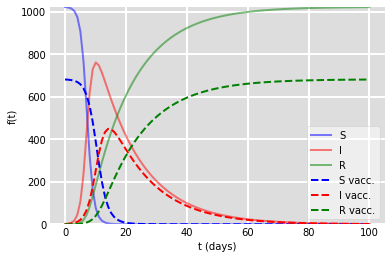

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 2 ** 10
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
vaccRate = 1 / 3
SB0 = S0 * (1 - vaccRate)
IB0 = I0
RB0 = R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.001, 1./14 
# A grid of time points (in days)
t = np.linspace(0, 100, 100)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    SB, IB, RB, S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    dSBdt = -beta * SB * IB
    dIBdt = beta * SB * IB - gamma * IB
    dRBdt = gamma * IB
    return dSBdt, dIBdt, dRBdt, dSdt, dIdt, dRdt

# Initial conditions vector
y0 = SB0, IB0, RB0, S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
SB, IB, RB, S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='S')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='I')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='R')
ax.plot(t, SB, 'b--', alpha=1, lw=2, label='S vacc.')
ax.plot(t, IB, 'r--', alpha=1, lw=2, label='I vacc.')
ax.plot(t, RB, 'g--', alpha=1, lw=2, label='R vacc.')
ax.set_xlabel('t (days)')
ax.set_ylabel('f(t)')
ax.set_ylim((0, N))
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()